Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [104]:
GROUP_NR = "23"
NAMES = "Carl Örnberg"
DATE = ""

# Differentiation

In these exercises we will be working with derivatives. 

 - We will learn how various differentiating schemes perform by applying them to functions, whose exact derivative we know and can calculate exactly.
 - We will study how the usual rules for derivatives (sum, product, chain) apply to the numerical case.
 - We will apply derivatives to study solutions to a simple physics scenario.
 
As usual, we first import the necessary modules.

In [105]:
import numpy as np
import matplotlib.pyplot as plt

***

**Reminder: All your figures and plot must be self-explanatory: label the axes, print a legend or a title...**

***

## Problem 1

Define in Python three functions, `forward`, `backward` and `central`, which implement the corresponding difference scheme. So the functions should look something like this:

``` python
def forward(f, x, h):
    """This function calculates the forward difference of function f at position x,
    i.e. the difference between f(x+h) and f(x), and divides the result by h. 
    h should be a small, positive number. 
    """
    dfdx = ...
    return dfdx

def backward(f, x, h):
    """This function calculates the backward difference of function f at position x,
    i.e. the difference between f(h) and f(x-h), and divides the result by h. 
    h should be a small, positive number. 
    """
    dfdx = ...
    return dfdx

def central(f, x, h):
    """This function calculates the central difference of function f at position x,
    i.e. the difference between f(x+h/2) and f(x-h/2), and divides the result by h. 
    h should be a small, positive number. 
    """
    dfdx = ...
    return dfdx
```

In [106]:
def forward(f, x, h):
    dfdx = (f(x+h)-f(x))/h
    return dfdx

def backward(f, x, h):
    dfdx = (f(x)-f(x-h))/h
    return dfdx

def central(f, x, h):
    dfdx = (f(x+h/2)-f(x-h/2))/h
    return dfdx

## Problem 2

You will now evaluate how the methods you implemented in Problem 1 perform. A simple way to do that is to compare the results of each derivation method to the analytical derivative for a given function $f(x)$. The analytical derivative is considered as the exact value of the derivative.

Let's consider the function
$$
f(x) = x\sin(x^2) + 1 \quad x \in [-2; 3]
$$

## Problem 2a

1. Define the function ```f(x)``` that returns $f(x)$.

2. Define the function ```fprime(x)``` that returns $f^{\prime}(x)$, the analytical derivative of $f(x)$.

3. Plot $f(x)$ and $f^{\prime}(x)$ for $x \in [-2; 3]$, using an array of $x$ with a step $h=0.1$ (so $x = -2.0, -1.9, -1.8 \cdots 2.9, 3.0$)

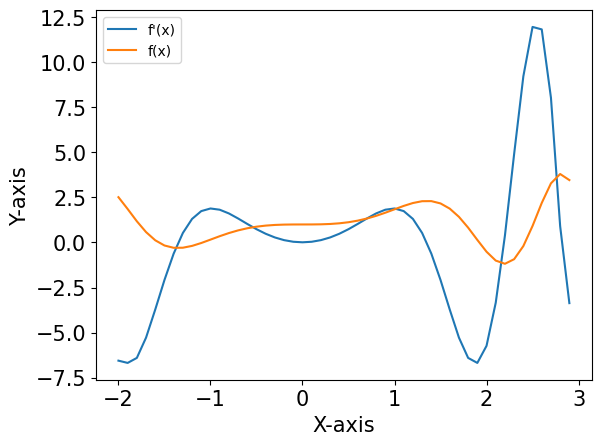

In [107]:
### BEGIN SOLUTION

# 1
def f(x):
    return x * np.sin(x**2) + 1

# 2
# Här kan du lägga till kod för det andra steget
def fprime(f, x):
    fp_analytic = np.gradient(f(x), x)
    return fp_analytic
# 3

h = 0.1
x = np.arange(-2, 3, h) 

plt.plot(x, fprime(f, x), label="f'(x)")
plt.plot(x, f(x), label="f(x)") 
plt.legend()
plt.xlabel('X-axis', fontsize=15) #X-Label
plt.ylabel('Y-axis', fontsize=15) #Y-Label
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show() 
# Här kan du lägga till kod för det tredje steget

### END SOLUTION


## Problem 2b

Now evaluate the derivatives obtained using your functions ```backward``` and ```central``` defined in Problem 1. Use the same $x$ interval as in Problem 2a.

In [108]:
### BEGIN SOLUTION
dfdx_backwards = backward(f, x , h)
dfdx_central = central(f, x , h)


### END SOLUTION

## Problem 2c

1. Now make a subplot with two rows and one column . 

2. On the upper subplot, **line plot** again $f'(x)$ as defined in Problem 2a, and superimpose the results you just obtained with the backward and central methods. Ensure the three functions are clearly identifiable on the plot.

3. On the lower subplot, **scatter plot** the differences between each method (backward and central) and the analytical $f'(x)$. This will help you to visualize which method is closer to the analytical derivative.

4. What method, central or backward difference, returns the best approximation of $f'(x)$?

Central returns the best approximation


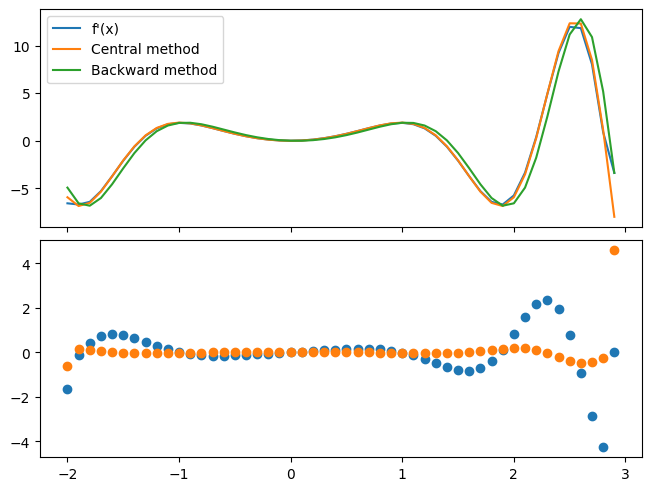

In [109]:
### BEGIN SOLUTION

# 1
fig, ax = plt.subplots(2, 1, sharex=True, constrained_layout=True)
            
# 2
ax[0].plot(x, fprime(f, x), label="f'(x)")
ax[0].plot(x, dfdx_central, label = "Central method") 
ax[0].plot(x, dfdx_backwards, label = "Backward method")
ax[0].legend()
    
# 3
ax[1].scatter(x, (fprime(f, x)-dfdx_backwards), label = "Backward error") 
ax[1].scatter(x, (fprime(f, x)-dfdx_central), label = "Central error") 
# 4
backward_error = np.std(fprime(f, x)-dfdx_backwards)
central_error = np.std(fprime(f, x)-dfdx_central)
if backward_error < central_error:
    print("Backwards returns the best approximation")
elif backward_error > central_error:
    print("Central returns the best approximation")
else:
    print("They are equally good")

### END SOLUTION

## Problem 3

The purpose of this problem is to compare other versions of the forward and central differences methods to those you already defined in Problem 1.

They are the **second forward-difference approximation**:

$$
f'(x) = \frac{4f(x+\frac{h}{2}) - f(x+h) - 3f(x)}{2h} + \mathcal{O}(h^2)
$$

and the **second central-difference approximation**:

$$
f'(x) = \frac{27f(x+\frac{h}{2}) + f(x-\frac{3}{2}h) - 27f(x-\frac{h}{2}) - f(x+\frac{3}{2}h)}{24h} + \mathcal{O}(h^4)
$$

Our test function will be $f(x) = e^{\sin(2x)}$ with $x\in[0, 2]$ and the step between each $x$ value is $h = 0.1$.

1. Define the function $f(x)$, it's exact derivative $f'(x)$ and the two new methods approximation above (without the $\mathcal{O}$ term.). Like in problem 1, the two methods must take $f$, $x$ and $h$ as parameters.
2. Create the values $x = [0, 0.1 \cdots 1.9, 2.0]$.
3. Using these, compute $f'(x)$ and the results from the backward, central, 2nd-backward and 2nd-central difference methods. You should thus have your results stored in five different variables, one per method. 
4. Knowing that $f'(x)$ is the best result possible, rate each of the four methods (backward, central, 2nd-backward and 2nd-central difference methods) from the higher to the lower performance. **Justify quantitatively** your rating using ```np.std``` (see lecture).

In [110]:
### BEGIN SOLUTION
# 1
import numpy as np
def f(x):
    return np.exp(np.sin(2*x))

def fp(f, x):
    return np.gradient(f(x), x)

def sf(f, x, h):
    return (4*f(x + h/2) - f(x + h) - 3*f(x)) / (2*h)

def sc(f, x, h):
    return (27*f(x+h/2) + f(x - 3*h/2) - 27*f(x-h/2) - f(x + 3*h/2)) / (24*h)
# 2
h = 0.1
x = np.arange(0, 2.1, h)

# 3
forward = forward(f, x, h)
forward_second = sf(f, x, h)
central = central(f, x, h)
central_second = sc(f, x, h)
f_prim = fp(f, x)
derivative = [forward, forward_second, central, central_second]

# 4
errors = [np.std(f_prim - derivative[i]) for i in range(0, len(derivative))]

for j in range(0, len(errors)):
    print(errors[j])


    
### END SOLUTION

0.2580766155610676
1.0320815032291788
0.05518499064828288
0.05899752518213752


## Problem 4

We will look at the sum and product rule for derivatives in the context of numerical differentiation. i.e. by using the function ```gradient``` from the ```numpy``` package.

We will work with the two functions

$$ f(x) = \sin x$$
$$ g(x) = x^2$$ 

### Problem 4a

We start with the sum rule, i.e.

$$(f + g)'(x) = f'(x) + g'(x)$$

where $f'(x)$ is the usual short-hand notation for $\frac{df}{dx}$.

We showed in the lecture that the sum rule is also valid for central differences. Let's convince ourselves by using `np.gradient`.

1. Define the functions $f'(x)$ and $ g'(x)$  
2. Use ```np.linspace``` to create the array ```x``` such that $x\in[0, \pi]$ and the length of ```x``` is $100$.
3. Use ```np.gradient``` to calculate ```dev1``` the **derivative of the sum** $(f+g)'(x)$ in the variable and ```dev2``` the **sum of the derivatives** of $f'(x) + g'(x)$.
4. Plot the difference between ```dev1``` and ```dev2```. Use any kind of representation you want but make the plot clear.
5. Conclude

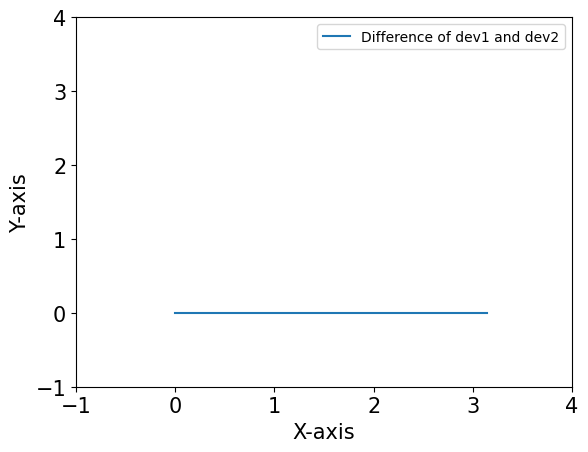

In [120]:
### BEGIN SOLUTION
# 1
def f(x):
    return np.sin(x)

def g(x):
    return x**2
# 2
x = np.linspace(0, np.pi, 100)

# 3
dev1 = np.gradient((f(x) + g(x)), x)
dev2 = np.gradient(f(x), x) + np.gradient(g(x), x)

# 4

plt.plot(x, dev1-dev2, label="Difference of dev1 and dev2")
plt.xlabel('X-axis', fontsize=15) #X-Label
plt.ylabel('Y-axis', fontsize=15) #Y-Label
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.legend()
plt.show()
# 5

### END SOLUTION

### Problem 4b

Now, let's look at the product rule, i.e.

$$(f * g)'(x) = f'(x) * g(x) + f(x) * g'(x)$$

Derive what the product rule looks like for central differences, i.e start with the expression

$$\frac{f(x+h) g(x+h)-f(x-h) g(x-h)}{2h}$$

and manipulate it algebraically such that the result looks like what you would expect from the product rule. Keep in mind that the limit $h\rightarrow 0$.

***
**YOUR ANSWER HERE**
$\frac{f(x+h)g(x+h) - f(x-h)g(x-h)}{2h} = \frac{f(x+h)g(x+h) - f(x)g(x+h) + f(x)g(x+h) - f(x)g(x) + f(x)g(x) - f(x-h)g(x) + f(x-h)g(x) - f(x-h)g(x-h)}{2h} = \frac{f'(x)g(x)}{2} + \frac{f(x)g'(x)}{2} + \frac{f'(x)g(x)}{2} + \frac{f(x)g'(x)}{2} = f'(x)g(x) + f(x)g'(x) $
*Do this with pen and paper first and then fill in your solution in this cell using markdown + LaTeX.*

***

Then as you did for the sum rule:

1. Use ```np.gradient``` to calculate ```dev1``` the **derivative of the product** $(f*g)'(x)$ in the variable and ```dev2``` the **product rule** $f'(x) * g(x) + f(x) * g'(x)$.
2. Plot the difference between ```dev1``` and ```dev2```. Use any kind of representation you want but make the plot clear.
3. Define a function ```exact```, that calculates the exact (analytical) derivative of the function $(f*g)(x)$
4. On the same graph, plot the difference between the exact solution and ```dev1``` and the difference between the exact solution and ```dev2```.


In [122]:


### END SOLUTION

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3885947670.py, line 5)

## Problem 5
***
**Forewords**:
This next problem is based on questions designed (over several iterations and with quite some extra editing) with chatGPT. 
If you want (**but you don't have to!!**), you can try to solve them with chatGPT as well, although beware that it may take several iterations to obtain a correct result. So if you use chatGPT, make sure that you understand the answers and have made sure that they are correct.
***

In a rather gigantic physics experiment, a ball is dropped from the rooftop of Karlatornet in a vacuum and its position (downward with respect to the position where it was dropped) as a function of time is recorded in the file ```fall.txt```. This file is read in the first code cell below. 

In [ ]:
time, position = np.loadtxt('fall.txt')   # time in seconds, position in meters downward

FileNotFoundError: fall.txt not found.

The ball is only submitted to the Earth's gravitational attraction $g$, which is the second time derivative of the position (right?). You can safely assume that $g$ is constant during the entire fall. 

The aim of this exercise is to compute the value of $g$ at the location of the experiment, using **differentiation methods only** (there are other ways to solve it). 

### Problem 5a
1. Choose a differentation method that you think works well and compute $g$. 
2. Print $g$ **and** write what you think about this value. Before going further, take a moment to think about what could be wrong.

In [ ]:
### BEGIN SOLUTION

# 1

# 2

### END SOLUTION

### Problem 5b
As often in physics, no sensor or setting being strictly perfect, measurements are degraded by various noises that pollute the observation. If you plot the positions as a function of time (optional), you will see why differentiating the raw positions is not satisfactory.

So, as you may have guessed already, we must first smooth the observed positions, and then compute $g$ on these smoothed positions.

Smoothing techniques are not the point of this topic so we simply give away the method below 

``` python
def running_mean(t, x, N):
    """ 
    t: time
    x: position
    N: window size
    """
    cumsum = np.cumsum(np.insert(x, 0, 0))
    # The length of a smoothed array diminishes with 
    # the window_size, thus one must decrease by the 
    # same amount the length of the time array.
    ts = t[N//2:-N//2+1] # new time array
    xs = (cumsum[N:] - cumsum[:-N]) / float(N)  # smoothed x array
    return ts, xs

# Example of use
window_size = 3  # Adjust the window size as you like, the larger the ```window_size```, the stronger the smoothing.
time_ok, smoothed_position = running_mean(time, position, window_size)
```

Now, do again the questions in Problem 5a, but using the smoothed position using a ```window_size``` value that you think is appropriate. For your reference, the data were created using $g=9.7$ m.s$^{-2}$.

In [ ]:
def running_mean(t, x, N):
    """ 
    t: time
    x: position
    N: window size
    """
    cumsum = np.cumsum(np.insert(x, 0, 0))
    # The length of a smoothed array diminishes with 
    # the window_size, thus one must decrease by the 
    # same amount the length of the time array.
    ts = t[N//2:-N//2+1] # new time array
    xs = (cumsum[N:] - cumsum[:-N]) / float(N)  # smoothed x array
    return ts, xs

### BEGIN SOLUTION

### END SOLUTION